In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, auc, roc_auc_score, roc_curve
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV
from itertools import cycle
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelEncoder

In [2]:
drive.mount('/content/drive', force_remount=True)
location ='drive/MyDrive/ML-Dataset/'
list_of_files = os.listdir(location)

Mounted at /content/drive


In [3]:
df= pd.read_csv(location+'mlp.csv', sep=",")
df

,Sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
# Null value estimation
df.isnull().all()
# finding the number of each species of flowers
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [5]:
# Features
X=df.iloc[:, 0:4]
# targets
y=df.iloc[:, [4]]

In [6]:
ordinal_encoder = OrdinalEncoder()
X = X.astype(str)
X = ordinal_encoder.fit_transform(X)

le = LabelEncoder()
y=le.fit_transform(y.values.ravel())
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
def f_performance(cm):
  FP = cm.sum(axis=0) - np.diag(cm)
  FP = FP.astype(float)
  FN = cm.sum(axis=1) - np.diag(cm)
  FN = FN.astype(float)
  TP = np.diag(cm)
  TP = TP.astype(float)
  TN = cm.sum() - (FP + FN + TP)
  TN = TN.astype(float)

  # Sensitivity
  TPR = TP/(TP+FN)
  # Specificity
  TNR = TN/(TN+FP)
  # Precision
  PPV = TP/(TP+FP)
  # False positive rate
  FPR = FP/(FP+TN)
  # False negative rate
  FNR = FN/(TP+FN)

  for i in range(0,3):
    print("Sensitivity_class_{}: {}".format(i,TPR[i]))
    print("Specificity_class_{}: {}".format(i,TNR[i]))
    print("Precision_class_{}: {}".format(i, PPV[i]))
    f1_score = (2*PPV[i]*TPR[i])/(PPV[i]+TPR[i])
    print("F1_score_class_{}: {}".format(i, f1_score))
    print()

# **Show the performance of each class of 5fold**

GridSearch CV - Hiddenlayer - 1

0.6333333333333333


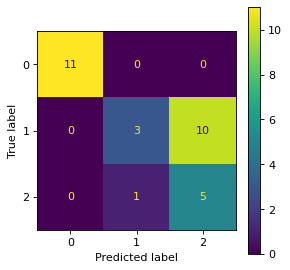

Sensitivity_class_0: 1.0
Specificity_class_0: 1.0
Precision_class_0: 1.0
F1_score_class_0: 1.0

Sensitivity_class_1: 0.23076923076923078
Specificity_class_1: 0.9411764705882353
Precision_class_1: 0.75
F1_score_class_1: 0.3529411764705882

Sensitivity_class_2: 0.8333333333333334
Specificity_class_2: 0.5833333333333334
Precision_class_2: 0.3333333333333333
F1_score_class_2: 0.47619047619047616



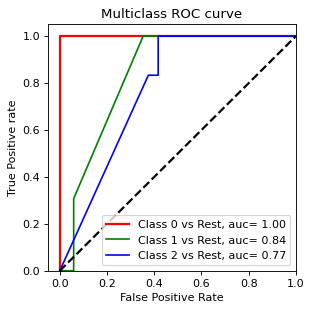

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, train_size = 0.8, random_state = 1)

#Multilayer Perceptron classifier
mlp = MLPClassifier()
param_grid = {
    'max_iter': [800],
    'hidden_layer_sizes': [(3, )],
    'activation': ['relu'],
    'solver': ['lbfgs'],
    'shuffle' : [False],
    }

#5 Fold cross validation
clf = GridSearchCV(estimator= mlp, param_grid=param_grid, cv = 5, return_train_score=True)

#fit the classifier
score = clf.fit(X_train, np.ravel(y_train)).predict_proba(X_test)
y_pred = clf.predict(X_test)

#Accuracy
print(accuracy_score(y_test, y_pred))

#confusion matrix
plt.rcParams.update({'figure.figsize':(4,4), 'figure.dpi':80})
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Performance - Sensitivity, Specificity, F1_score, Precision
f_performance(cm)

# roc curve for classes
pred_prob = clf.predict_proba(X_test)

binary_labels = label_binarize(y_test, classes=[0,1,2])
n_classes = binary_labels.shape[1]

fpr = {}
tpr = {}
thresh ={}
roc_auc = {}
n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(binary_labels[:, i], pred_prob[:,i])
    roc_auc[i]=auc(fpr[i],tpr[i])        
plt.plot(fpr[0], tpr[0], color='red', label='Class 0 vs Rest, auc= %0.2f' %roc_auc[0],lw=2)
plt.plot(fpr[1], tpr[1], color='green', label='Class 1 vs Rest, auc= %0.2f'%roc_auc[1])
plt.plot(fpr[2], tpr[2], color='blue', label='Class 2 vs Rest, auc= %0.2f'%roc_auc[2])
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

GridSearch CV - Hiddenlayer - 2

0.9666666666666667


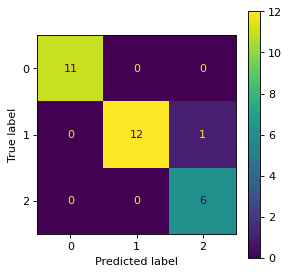

Sensitivity_class_0: 1.0
Specificity_class_0: 1.0
Precision_class_0: 1.0
F1_score_class_0: 1.0

Sensitivity_class_1: 0.9230769230769231
Specificity_class_1: 1.0
Precision_class_1: 1.0
F1_score_class_1: 0.9600000000000001

Sensitivity_class_2: 1.0
Specificity_class_2: 0.9583333333333334
Precision_class_2: 0.8571428571428571
F1_score_class_2: 0.923076923076923



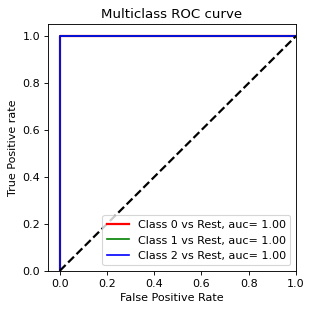

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, train_size = 0.8, random_state = 1)

#Multilayer Perceptron classifier
mlp = MLPClassifier()
param_grid = {
    'max_iter': [800],
    'hidden_layer_sizes': [(8, 16)],
    'activation': ['relu'],
    'solver': ['lbfgs'],
    'shuffle' : [False],
    }

#5 Fold cross validation
clf = GridSearchCV(estimator= mlp, param_grid=param_grid, cv = 5, return_train_score=True)

#fit the classifier
score = clf.fit(X_train, np.ravel(y_train)).predict_proba(X_test)
y_pred = clf.predict(X_test)

#Accuracy
print(accuracy_score(y_test, y_pred))

#confusion matrix
plt.rcParams.update({'figure.figsize':(4,4), 'figure.dpi':80})
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Performance - Sensitivity, Specificity, F1_score, Precision
f_performance(cm)

# roc curve for classes
pred_prob = clf.predict_proba(X_test)

binary_labels = label_binarize(y_test, classes=[0,1,2])
n_classes = binary_labels.shape[1]

fpr = {}
tpr = {}
thresh ={}
roc_auc = {}
n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(binary_labels[:, i], pred_prob[:,i])
    roc_auc[i]=auc(fpr[i],tpr[i])        
plt.plot(fpr[0], tpr[0], color='red', label='Class 0 vs Rest, auc= %0.2f' %roc_auc[0],lw=2)
plt.plot(fpr[1], tpr[1], color='green', label='Class 1 vs Rest, auc= %0.2f'%roc_auc[1])
plt.plot(fpr[2], tpr[2], color='blue', label='Class 2 vs Rest, auc= %0.2f'%roc_auc[2])
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

# **Show the performance of each class of each fold**

*****Hidden Layer  - ****** : 1
Accuracy for fold 1:  0.6666666666666666


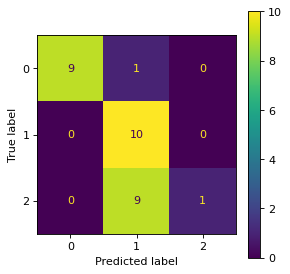

Sensitivity_class_0: 0.9
Specificity_class_0: 1.0
Precision_class_0: 1.0
F1_score_class_0: 0.9473684210526316

Sensitivity_class_1: 1.0
Specificity_class_1: 0.5
Precision_class_1: 0.5
F1_score_class_1: 0.6666666666666666

Sensitivity_class_2: 0.1
Specificity_class_2: 1.0
Precision_class_2: 1.0
F1_score_class_2: 0.18181818181818182



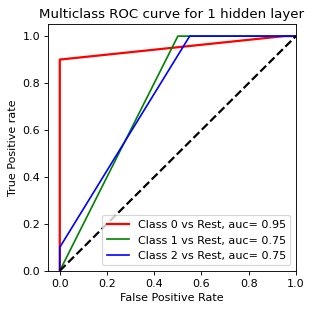

Accuracy for fold 2:  0.3


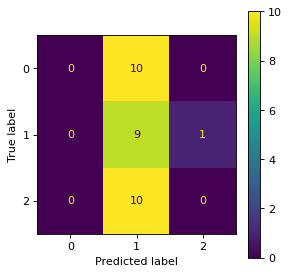

<ipython-input-7-f24bbd1e3211>:16: RuntimeWarning: invalid value encountered in true_divide
  PPV = TP/(TP+FP)
<ipython-input-7-f24bbd1e3211>:26: RuntimeWarning: invalid value encountered in double_scalars
  f1_score = (2*PPV[i]*TPR[i])/(PPV[i]+TPR[i])


Sensitivity_class_0: 0.0
Specificity_class_0: 1.0
Precision_class_0: nan
F1_score_class_0: nan

Sensitivity_class_1: 0.9
Specificity_class_1: 0.0
Precision_class_1: 0.3103448275862069
F1_score_class_1: 0.4615384615384615

Sensitivity_class_2: 0.0
Specificity_class_2: 0.95
Precision_class_2: 0.0
F1_score_class_2: nan



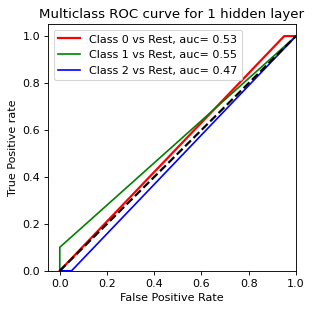

Accuracy for fold 3:  0.9666666666666667


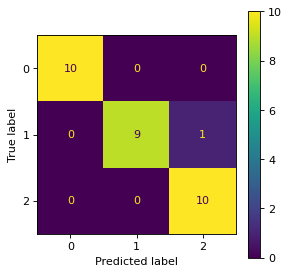

Sensitivity_class_0: 1.0
Specificity_class_0: 1.0
Precision_class_0: 1.0
F1_score_class_0: 1.0

Sensitivity_class_1: 0.9
Specificity_class_1: 1.0
Precision_class_1: 1.0
F1_score_class_1: 0.9473684210526316

Sensitivity_class_2: 1.0
Specificity_class_2: 0.95
Precision_class_2: 0.9090909090909091
F1_score_class_2: 0.9523809523809523



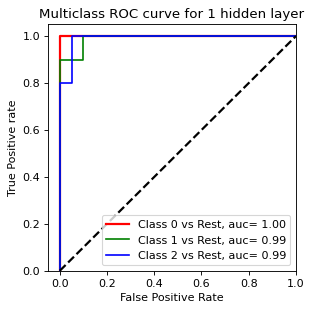

Accuracy for fold 4:  1.0


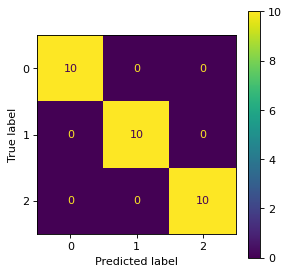

Sensitivity_class_0: 1.0
Specificity_class_0: 1.0
Precision_class_0: 1.0
F1_score_class_0: 1.0

Sensitivity_class_1: 1.0
Specificity_class_1: 1.0
Precision_class_1: 1.0
F1_score_class_1: 1.0

Sensitivity_class_2: 1.0
Specificity_class_2: 1.0
Precision_class_2: 1.0
F1_score_class_2: 1.0



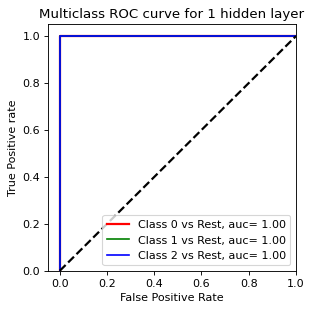

Accuracy for fold 5:  1.0


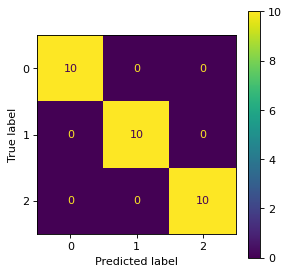

Sensitivity_class_0: 1.0
Specificity_class_0: 1.0
Precision_class_0: 1.0
F1_score_class_0: 1.0

Sensitivity_class_1: 1.0
Specificity_class_1: 1.0
Precision_class_1: 1.0
F1_score_class_1: 1.0

Sensitivity_class_2: 1.0
Specificity_class_2: 1.0
Precision_class_2: 1.0
F1_score_class_2: 1.0



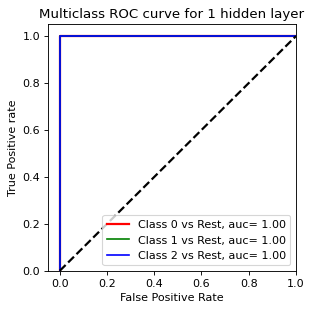

*****Hidden Layer  - ****** : 2
Accuracy for fold 1:  0.9


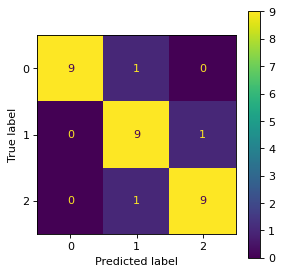

Sensitivity_class_0: 0.9
Specificity_class_0: 1.0
Precision_class_0: 1.0
F1_score_class_0: 0.9473684210526316

Sensitivity_class_1: 0.9
Specificity_class_1: 0.9
Precision_class_1: 0.8181818181818182
F1_score_class_1: 0.8571428571428572

Sensitivity_class_2: 0.9
Specificity_class_2: 0.95
Precision_class_2: 0.9
F1_score_class_2: 0.9



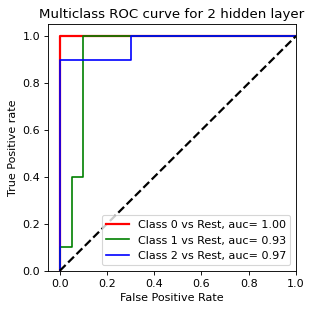

Accuracy for fold 2:  1.0


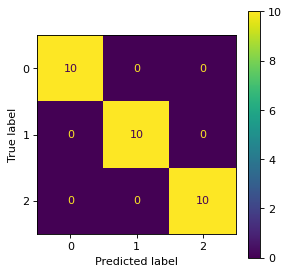

Sensitivity_class_0: 1.0
Specificity_class_0: 1.0
Precision_class_0: 1.0
F1_score_class_0: 1.0

Sensitivity_class_1: 1.0
Specificity_class_1: 1.0
Precision_class_1: 1.0
F1_score_class_1: 1.0

Sensitivity_class_2: 1.0
Specificity_class_2: 1.0
Precision_class_2: 1.0
F1_score_class_2: 1.0



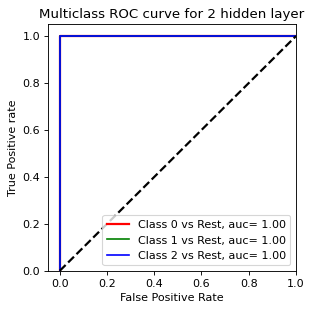

Accuracy for fold 3:  0.9666666666666667


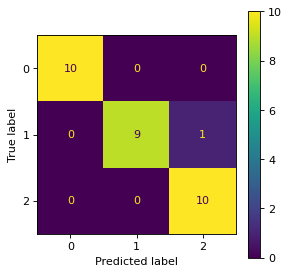

Sensitivity_class_0: 1.0
Specificity_class_0: 1.0
Precision_class_0: 1.0
F1_score_class_0: 1.0

Sensitivity_class_1: 0.9
Specificity_class_1: 1.0
Precision_class_1: 1.0
F1_score_class_1: 0.9473684210526316

Sensitivity_class_2: 1.0
Specificity_class_2: 0.95
Precision_class_2: 0.9090909090909091
F1_score_class_2: 0.9523809523809523



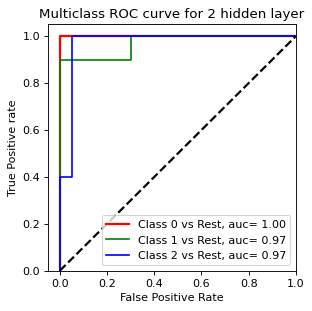

Accuracy for fold 4:  0.9666666666666667


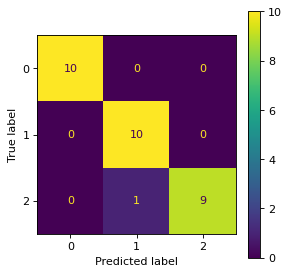

Sensitivity_class_0: 1.0
Specificity_class_0: 1.0
Precision_class_0: 1.0
F1_score_class_0: 1.0

Sensitivity_class_1: 1.0
Specificity_class_1: 0.95
Precision_class_1: 0.9090909090909091
F1_score_class_1: 0.9523809523809523

Sensitivity_class_2: 0.9
Specificity_class_2: 1.0
Precision_class_2: 1.0
F1_score_class_2: 0.9473684210526316



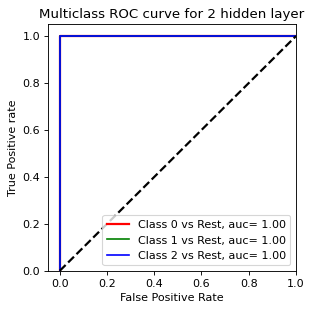

Accuracy for fold 5:  0.9333333333333333


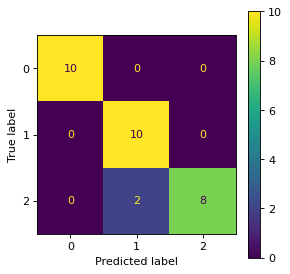

Sensitivity_class_0: 1.0
Specificity_class_0: 1.0
Precision_class_0: 1.0
F1_score_class_0: 1.0

Sensitivity_class_1: 1.0
Specificity_class_1: 0.9
Precision_class_1: 0.8333333333333334
F1_score_class_1: 0.9090909090909091

Sensitivity_class_2: 0.8
Specificity_class_2: 1.0
Precision_class_2: 1.0
F1_score_class_2: 0.888888888888889



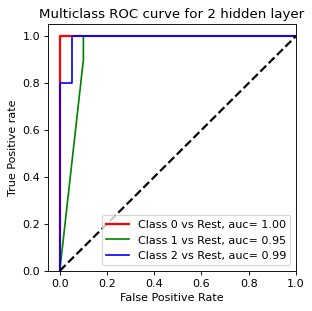

In [10]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

mlp = {
    '1': MLPClassifier(hidden_layer_sizes = (3, ), activation = 'relu', solver = 'lbfgs', alpha = 0.001, max_iter = 800, shuffle = False, max_fun = 1500),
    '2': MLPClassifier(hidden_layer_sizes = (8, 16), activation = 'relu', solver = 'lbfgs', alpha = 0.001, max_iter = 800, shuffle = False, max_fun = 1500)
    }

for key, value in mlp.items():
  print("*****Hidden Layer  - ****** : {}".format(key))
  fold = 1
  for train_index, test_index in cv.split(X, y):
      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = y[train_index], y[test_index]
      # Fit the classifier
      value.fit(X_train, y_train)
      y_pred = value.predict(X_test)
      score = accuracy_score(y_test, y_pred)
      cm = confusion_matrix(y_test, y_pred)

      # Accuracy fold wise
      print(f"Accuracy for fold {fold}: ", score)

      plt.rcParams.update({'figure.figsize':(4,4), 'figure.dpi':80})

      # confusion matrix
      disp = ConfusionMatrixDisplay(confusion_matrix=cm)
      disp.plot()
      plt.show()

      # Performance - Sensitivity, Specificity, F1_score, Precision
      f_performance(cm)

      # roc-curve
      pred_prob = value.predict_proba(X_test)

      binary_labels = label_binarize(y_test, classes=[0,1,2])
      n_classes = binary_labels.shape[1]

      fpr = {}
      tpr = {}
      thresh ={}
      roc_auc = {}
      n_class = 3

      for i in range(n_class):    
          fpr[i], tpr[i], thresh[i] = roc_curve(binary_labels[:, i], pred_prob[:,i])
          roc_auc[i]=auc(fpr[i],tpr[i])        
      plt.plot(fpr[0], tpr[0], color='red', label='Class 0 vs Rest, auc= %0.2f' %roc_auc[0],lw=2)
      plt.plot(fpr[1], tpr[1], color='green', label='Class 1 vs Rest, auc= %0.2f'%roc_auc[1])
      plt.plot(fpr[2], tpr[2], color='blue', label='Class 2 vs Rest, auc= %0.2f'%roc_auc[2])
      plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
      plt.xlim([-0.05, 1.0])
      plt.ylim([0.0, 1.05])
      plt.title('Multiclass ROC curve for {} hidden layer'. format(key))
      plt.xlabel('False Positive Rate')
      plt.ylabel('True Positive rate')
      plt.legend(loc='best')
      plt.show()
      fold += 1